In [ ]:
In this tutorial we will analyze the reviews about different banks

### Load Packages


In [ ]:
install.packages("tidytext")
install.packages("textdata")
library(textdata)
library(tidytext)
library(tidyverse)
library(ggplot2)
library(dplyr)



Load the data set. you can find the data set in Kaggle

In [2]:
text<-read.csv("BankReviews.csv",sep=",",header=TRUE)

let’s examine the data

In [3]:
dim(text)

[1] 50  4

In [4]:
names(text)

[1] "Date"     "Stars"    "Reviews"  "BankName"

In [5]:
str(text)

'data.frame':	50 obs. of  4 variables:
 $ Date    : Factor w/ 39 levels "10/2/2017","10/4/2017",..: 2 1 19 12 27 18 12 11 32 20 ...
 $ Stars   : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Reviews : Factor w/ 49 levels "A good rate but a very frustrating process, constant delays, decisions made then changed, overwhelmed underwrit"| __truncated__,..: 10 26 44 45 13 15 28 31 16 11 ...
 $ BankName: Factor w/ 2 levels "North American Savings Bank",..: 2 2 2 2 2 2 2 2 2 2 ...


In [6]:
text$Reviews <- as.character(text$Reviews)


Tokenizing the reveiws  

In [46]:
text_token <- text %>% 
  unnest_tokens(word, Reviews) ## reviews column
text_token <- text_token %>% 
  group_by(Stars) %>% 
  mutate(original_word_order = seq_along(word))

In [8]:
head(text_token)

,Date,Stars,BankName,word
1,10/4/2017,5,Wyndham Capital Mortgage,great
1.1,10/4/2017,5,Wyndham Capital Mortgage,job
1.2,10/4/2017,5,Wyndham Capital Mortgage,wyndham
1.3,10/4/2017,5,Wyndham Capital Mortgage,capital
1.4,10/4/2017,5,Wyndham Capital Mortgage,each
1.5,10/4/2017,5,Wyndham Capital Mortgage,person


In [9]:
dim(text_token)

[1] 4207    4

In [ ]:
We can see how the number of rows increas because of we tokenize the Reviews

count the words

In [10]:
text_token %>% 
  count(word) %>% 
  arrange(desc(n))

word,n
the,183
and,154
to,123
i,106
a,92
was,80
with,73
of,68
we,59
for,56


Remove the stop words. Stop words are words such as and, or, the, etc.

In [11]:
text_token_without_Swords<- text_token %>%
anti_join(stop_words)

Joining, by = "word"


In [12]:
dim(text_token_without_Swords)

[1] 1562    4

We can see that the words become low by removing the stop words

In [13]:
text_token_without_Swords %>% 
  count(word) %>% 
  arrange(desc(n))

word,n
loan,41
process,30
nasb,23
home,21
mortgage,20
closing,19
time,18
bank,16
wyndham,16
recommend,15


In [38]:
word_counts <- text_token_without_Swords %>% 

  count(word) %>% 
  # plot the words that repeated more than 10 times
  filter(n>10)


plot the words

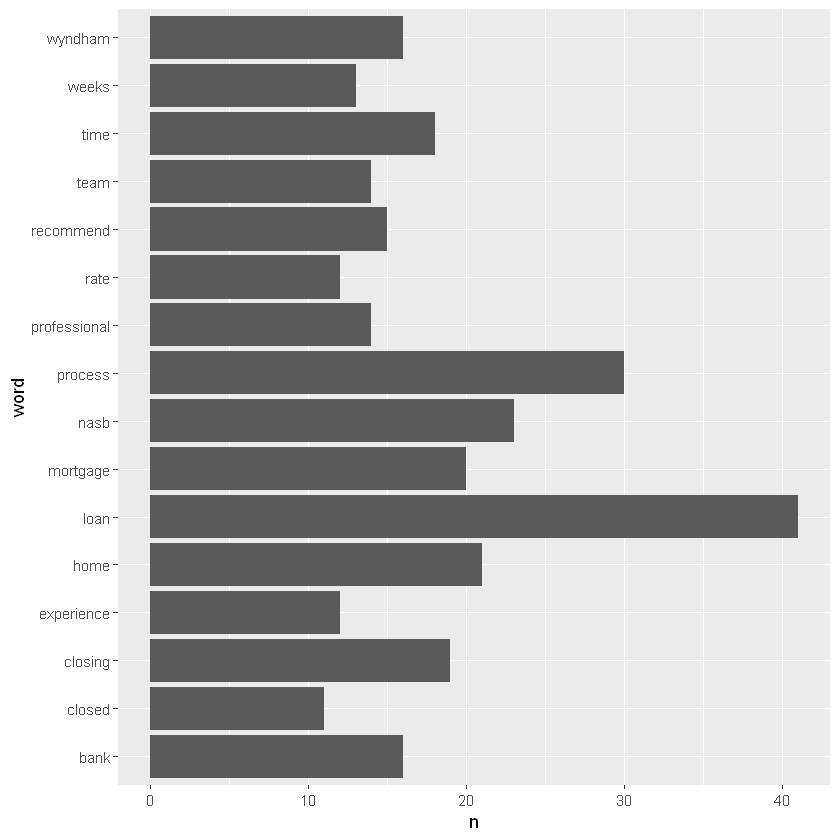

In [16]:
ggplot(word_counts, aes(x = word, y = n)) +
    geom_col() +
  # Flip the plot coordinates
  coord_flip()

improve the chart by arranging the frequent of words related to stars equal to five. We can choose any related variable

In [17]:
word_counts <- text_token_without_Swords %>% 
  filter(Stars == 5) %>% 
  count(word) %>% 
  # Keep terms that occur more than 100 times
  filter(n > 10) %>% 
  # Reorder word as an ordered factor by word counts
  mutate(word2 = fct_reorder(word, n))

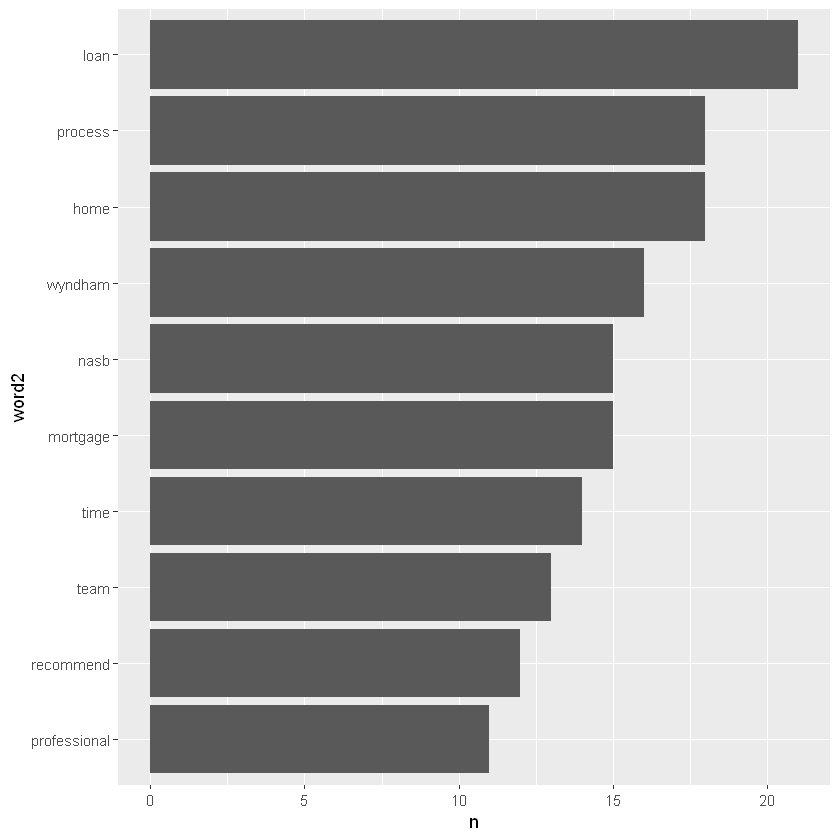

In [18]:
ggplot(word_counts, aes(x = word2, y = n)) +
    geom_col() +
  # Flip the plot coordinates
  coord_flip()

In [ ]:
now let's see the review words related with stars numbrt> which words related to number of stars

In [19]:
word_counts_bystars <- text_token_without_Swords %>%
  count(word, Stars) %>%
  group_by(Stars) %>%
  top_n(20, n) %>%
  ungroup() %>%
  mutate(word2 = fct_reorder(word, n))

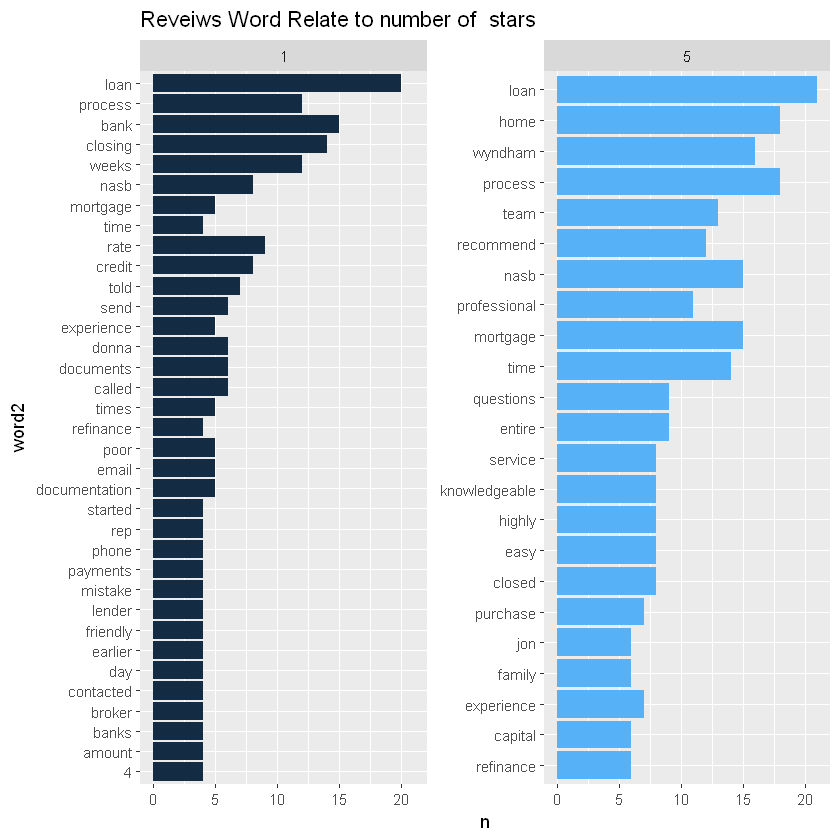

In [20]:
ggplot(word_counts_bystars, aes(x = word2, y = n, fill = Stars)) +
  geom_col(show.legend = FALSE) +
  # Facet by number of stars
  facet_wrap(~ Stars, scales = "free_y") +
  coord_flip() +
  ggtitle("Reveiws Word Relate to number of  stars")

In this data set we have 2 stars only either 1 or 5.in the above figure we show the frequent of word in each catogry

Or we can see the reviews based on bank Name as well

In [21]:
word_counts_bybankname <- text_token_without_Swords %>%
  count(word, BankName) %>%
  group_by(BankName) %>%
  top_n(20, n) %>%
  ungroup() %>%
  mutate(word2 = fct_reorder(word, n))

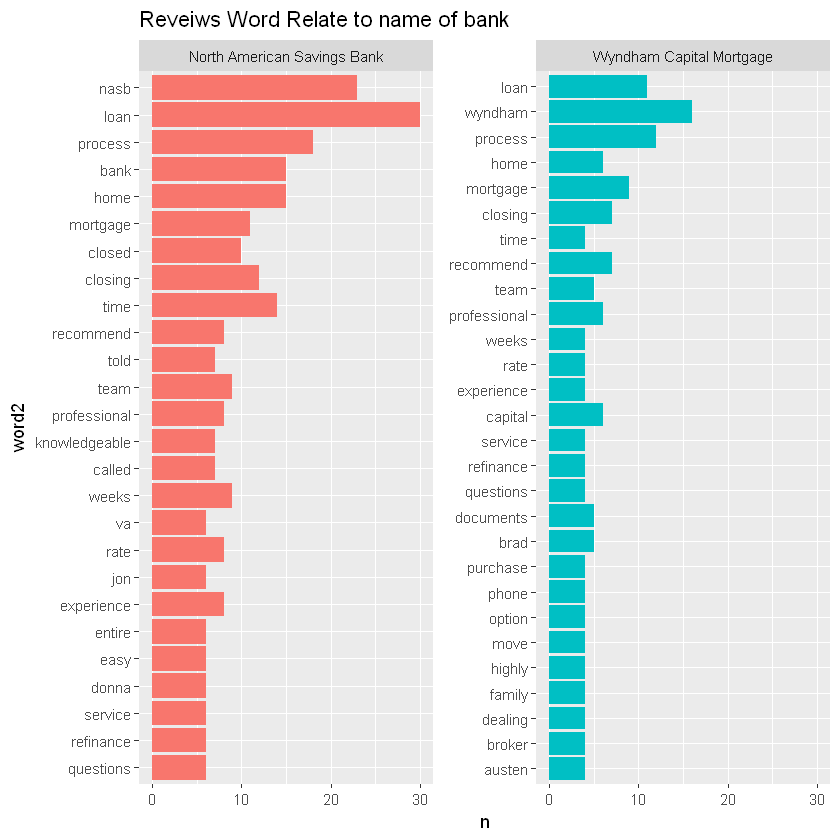

In [22]:
ggplot(word_counts_bybankname, aes(x = word2, y = n, fill = BankName)) +
  geom_col(show.legend = FALSE) +
  # Facet by number of stars
  facet_wrap(~ BankName, scales = "free_y") +
  coord_flip() +
  ggtitle("Reveiws Word Relate to name of bank")

L'es do some sentiment analysis using nrc.  NRC is a list of English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive)

In [23]:
sentiment_text <- text_token_without_Swords %>% 
  inner_join(get_sentiments("nrc"))

Joining, by = "word"


So let's see what words in our data is in nrc

In [25]:
sentiment_text %>% 
  count(sentiment)  
  
sentiment_text

sentiment,n
anger,20
anticipation,87
disgust,12
fear,42
joy,59
negative,75
positive,198
sadness,37
surprise,18
trust,200


Date,Stars,BankName,word,sentiment
10/4/2017,5,Wyndham Capital Mortgage,job,positive
10/4/2017,5,Wyndham Capital Mortgage,professional,positive
10/4/2017,5,Wyndham Capital Mortgage,professional,trust
10/2/2017,5,Wyndham Capital Mortgage,professional,positive
10/2/2017,5,Wyndham Capital Mortgage,professional,trust
10/2/2017,5,Wyndham Capital Mortgage,helpful,joy
10/2/2017,5,Wyndham Capital Mortgage,helpful,positive
10/2/2017,5,Wyndham Capital Mortgage,helpful,trust
10/2/2017,5,Wyndham Capital Mortgage,mortgage,fear
10/2/2017,5,Wyndham Capital Mortgage,excellent,joy


Conclusion: this simple tutorial to help understand analyzing text. 